<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [81]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [154]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('weight_height.csv')
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des



,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [ ]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

#no hay elementos faltantes

#crear una copia del df original
#df_clean = df.copy()
#eliminar los datos faltantes
#df_clean.dropna(subset = ['columna_con_datos_faltantes'], inplace = True)


In [13]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [60]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)

df2 = df.copy()
df2 = df2.rename(columns={'Weight': 'peso', 'Height': 'altura', 'Gender': 'sexo'})
df2['peso'] = df2['peso'].apply(lambda x: x * 0.453)
df2['altura'] = df2['altura'].apply(lambda x: x* 0.0254)
df2['sexo'] = df2['sexo'].apply(lambda x: "masculino" if x == "Male" else "femenino")
df2


,sexo,altura,peso
0,masculino,1.875714,109.577784
1,masculino,1.747060,73.526644
2,masculino,1.882397,96.371608
3,masculino,1.821967,99.679239
4,masculino,1.774998,93.476460
...,...,...,...
9995,femenino,1.680785,61.960187
9996,femenino,1.703506,77.403161
9997,femenino,1.622247,58.199319
9998,femenino,1.753470,74.225165


In [57]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print("Filas para analizar:", df2.shape[0])


Filas para analizar: 10000


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

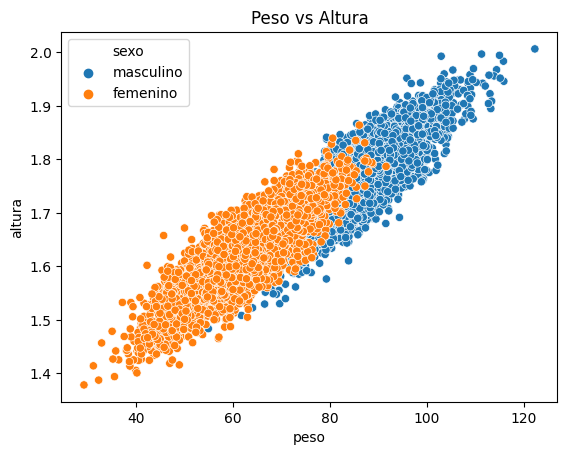

In [169]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos

sns.scatterplot(x = df2['peso'], y = df2['altura'], hue=df2['sexo'])
plt.title('Peso vs Altura')
plt.show()

Valor medio de altura en hombres: 1.75


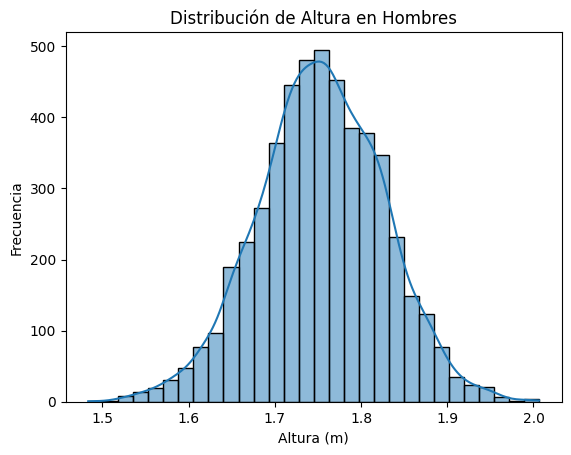

In [170]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
df_hombres = df2.copy()
df_hombres = df2[df2['sexo'] == 'masculino']
sns.histplot( x = df_hombres['altura'], bins = 30, kde=True)
plt.xlabel('Altura (m)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Altura en Hombres')

print("Valor medio de altura en hombres:", round(df_hombres['altura'].mean(), 2))


Valor medio de altura en mujeres: 1.62


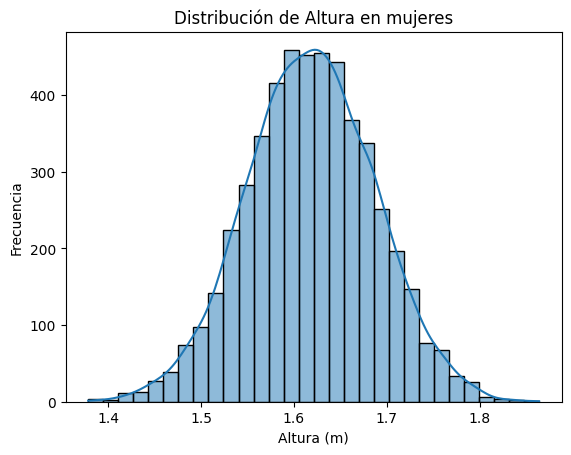

In [171]:
# Alumno: Dibujar la distribucion (histograma) de la altura en mujeres
# Además, imprimir en pantalla el valor medio

df_mujeres = df2.copy()
df_mujeres = df2[df2['sexo'] == 'femenino']
sns.histplot(x = df_mujeres['altura'], bins = 30, kde=True)
plt.xlabel('Altura (m)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Altura en mujeres')

print("Valor medio de altura en mujeres:", round(df_mujeres['altura'].mean(), 2))

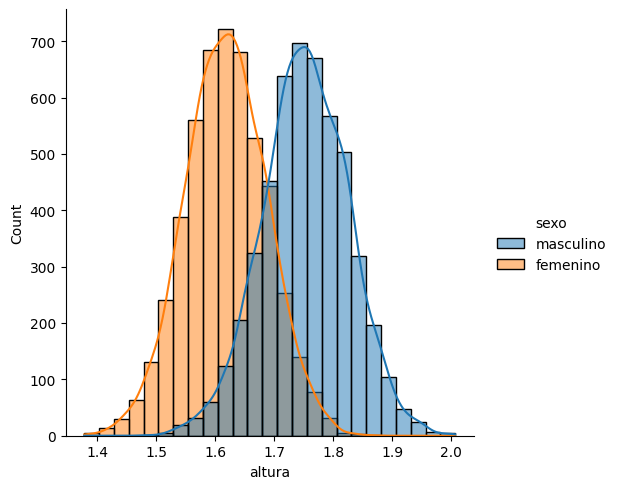

In [172]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"

sns.displot(data=df2, x="altura", hue="sexo", bins=25, kde=True)

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [173]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_encoding = le.fit_transform(df2['sexo'])
df2['sexo_le'] = label_encoding


In [174]:
x = df2[['peso', 'sexo_le']].values
y = df2['altura'].values

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [162]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
y_hat= lr.predict(X_test)

<Axes: xlabel='peso', ylabel='altura'>

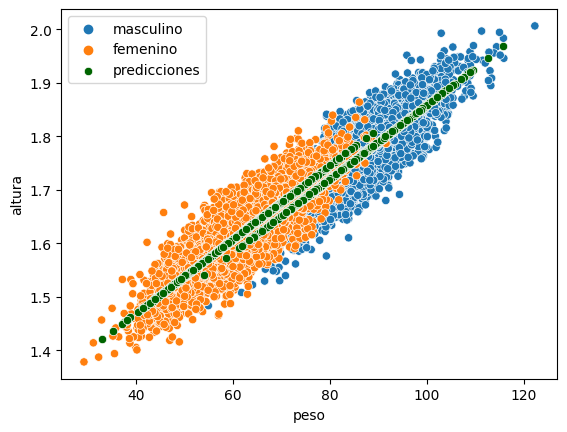

In [163]:
sns.scatterplot(x = df2['peso'], y = df2['altura'], hue=df2['sexo'])
sns.scatterplot(x=X_test[:, 0], y=y_hat, color='darkGreen', label='predicciones')

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [166]:
from sklearn.metrics import r2_score

value = r2_score(y_test, y_hat)
print(f"Coeficiente de determinación: {value:.2f}")

Coeficiente de determinación: 0.86


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [165]:
prueba = np.array([[73.54, 1]])
prueba2 = np.array([[61.65, 0]])

y_hat_prueba = lr.predict(prueba)
y_hat_prueba2 = lr.predict(prueba2)

y_hat_prueba, y_hat_prueba2

(array([1.67587367]), array([1.6188825]))